<DIV ALIGN=CENTER>

# Introduction to NLP: Topic Modeling
## Professor Robert J. Brunner
  
</DIV>  
-----
-----


## Introduction

When analyzing large text corpora, trends can appear. These trends can
be repeated use of common phrases or terms that are indicative of common
underlying themes or topics. For example, books on programming might
refer to themes such as human computer interaction, optimization and
performance, or identifying and removing error conditions. Finding these
common topics can be important for a number of reasons. On the one hand,
when they are completely unknown, they can be used to provide new
insight into text documents. On the other hand, when they may be
partially or even completely unknown, computationally identified topics
can provide deeper or more concise insight into the relationship between
documents.

The process of identifying these common topics is known as topic
modeling, which is generally a form of unsupervised learning. As a
specific example, consider the [twenty newsgroup][tw] data that we have
analyzed in scikit learn. While there are twenty different newsgroups,
it turns out they can be grouped into six related categories: computers,
sports, science, politics, religion, and miscellaneous. While we now
these topics ahead of time (from the newsgroup titles), we can apply
topic modeling to these data to identify the common words or phrases
that define these common topics.

In the rest of this notebook, we explore the concept of topic modeling.
First we will use the scikit learn library to perform topic modeling. We
will introduce and use non-negative matrix factorization and Latent
Dirchlet allocation. We apply topic modeling to a text classification
problem, and also explore the terms that make up identified topics.
Finally, we introduce the gensim library, which provides additional
techniques for topic modeling.


-----

[tw]: http://qwone.com/~jason/20Newsgroups/

In [1]:
# Set up Notebook

% matplotlib inline

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We do this to ignore several specific Pandas warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load Dataset
from sklearn.datasets import fetch_20newsgroups

train = fetch_20newsgroups(data_home='/home/data_scientist/data/textdm', 
                           subset='train', shuffle=True, random_state=23,
                           remove=('headers', 'footers', 'quotes'))

test = fetch_20newsgroups(data_home='/home/data_scientist/data/textdm', 
                          subset='test', shuffle=True, random_state=23,
                          remove=('headers', 'footers', 'quotes'))

In [3]:
# Use TD-IDF on newgroup data.
from sklearn.feature_extraction.text import TfidfVectorizer

cv = TfidfVectorizer(stop_words = 'english',
                     lowercase=True,
                     min_df=2,
                     max_features=5000)
                     
train_data = cv.fit_transform(train['data'])
test_data = cv.transform(test['data'])

-----

### Non-Negative Matrix Factorization

We can apply [non-negative matrix factorization][wnmf] (NMF) to compute
topics in a corpus. We start with a term-document matrix, which we
factor in to a term-feature and a feature-document matrices. The latter
matrix can be used to identify data clusters (or topics) in the corpus.
We demonstrate the use of NMF to perform topic modeling by using the
scikit learn library's [NMF implementation][sknmf]. 

-----

[wnmf]: https://en.wikipedia.org/wiki/Non-negative_matrix_factorization
[sknmf]: http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html

In [4]:
# Compute topics by using NMF
from sklearn.decomposition import NMF

num_topics = 6
nmf = NMF(n_components = num_topics, max_iter = 1000).fit(train_data)

In [5]:
from helper_code import tpterms as tp

nmf_topics = tp.get_topics(cv, nmf)

Topic  0: don just think people like good time know did right
Topic  1: drive scsi card disk hard drives controller ide new sale
Topic  2: god jesus bible believe faith christian christ christians people does
Topic  3: thanks windows does know file mail program files advance use
Topic  4: key chip encryption clipper keys government use escrow law public
Topic  5: geb edu dsl chastity n3jxp cadre pitt shameful intellect skepticism


-----

### Understanding Topic Terms

We can explore the terms that are important for each topic by creating a
DataFrame to map our topic terms to the original twenty newsgroups. We
demonstrate this below by first normalizing the transformed data to have
unit probability. We use these data to create the DataFrame and group
the resulting rows by the associated newsgroup as shown below.

-----

In [6]:
# We transform and normalize the data, 
# by using l1 so document topic probabilty sums to unity.

from sklearn.preprocessing import normalize

td = nmf.transform(train_data)
td_norm = normalize(td, norm='l1', axis=1)

In [7]:
# We use a DataFrame to simplify the collecting of the data for display.

df = pd.DataFrame(td_norm, columns=nmf_topics)
df.fillna(value=0, inplace=True)
df['label'] = pd.Series(train['target_names'], dtype="category")

df.groupby('label').mean()

,"don, just, think, people, like","drive, scsi, card, disk, hard","god, jesus, bible, believe, faith","thanks, windows, does, know, file","key, chip, encryption, clipper, keys","geb, edu, dsl, chastity, n3jxp"
label,,,,,,
alt.atheism,0.485414,0.000000,0.499776,0.014810,0.000000,0.000000
comp.graphics,0.000000,0.000000,0.114942,0.245522,0.000000,0.639536
comp.os.ms-windows.misc,0.850967,0.000000,0.000000,0.149033,0.000000,0.000000
comp.sys.ibm.pc.hardware,0.379016,0.000000,0.614521,0.000000,0.000000,0.006463
comp.sys.mac.hardware,0.000000,0.081715,0.034031,0.884254,0.000000,0.000000
comp.windows.x,0.632007,0.000000,0.013685,0.354307,0.000000,0.000000
misc.forsale,0.270890,0.188994,0.000000,0.540116,0.000000,0.000000
rec.autos,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
rec.motorcycles,0.626926,0.000000,0.076033,0.000000,0.248645,0.048396


-----
### Topic-based Classification

If documents are composed of topics, we can leverage defined topics to
classify new documents based on the topics that are assigned to each new
document. In the following code cells, we first train a Naive Bayes
classifier on the topics in the training data sample of the twenty
newsgroup data set. We compute the topics, by using the previously
created NMF model, for the test data and compute classifications from
these topic models. Finally, the resulting classification report and
confusion matrix are shown to demonstrate the quality of this
classification method.

-----

In [8]:
# Build classifier from topics.
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB().fit(td, train['target'])

# Apply classifier to blind test data
ts_preds = clf.predict(nmf.transform(test_data))

from sklearn import metrics

print(metrics.classification_report(test['target'], ts_preds,
    target_names = test['target_names']))

                          precision    recall  f1-score   support

             alt.atheism       0.00      0.00      0.00       319
           comp.graphics       0.00      0.00      0.00       389
 comp.os.ms-windows.misc       0.23      0.20      0.21       394
comp.sys.ibm.pc.hardware       0.27      0.50      0.35       392
   comp.sys.mac.hardware       0.00      0.00      0.00       385
          comp.windows.x       0.27      0.64      0.38       395
            misc.forsale       0.38      0.09      0.15       390
               rec.autos       0.26      0.04      0.07       396
         rec.motorcycles       0.09      0.16      0.12       398
      rec.sport.baseball       0.03      0.01      0.01       397
        rec.sport.hockey       0.13      0.86      0.22       399
               sci.crypt       0.59      0.63      0.61       396
         sci.electronics       0.28      0.14      0.19       393
                 sci.med       0.17      0.05      0.08       396
         

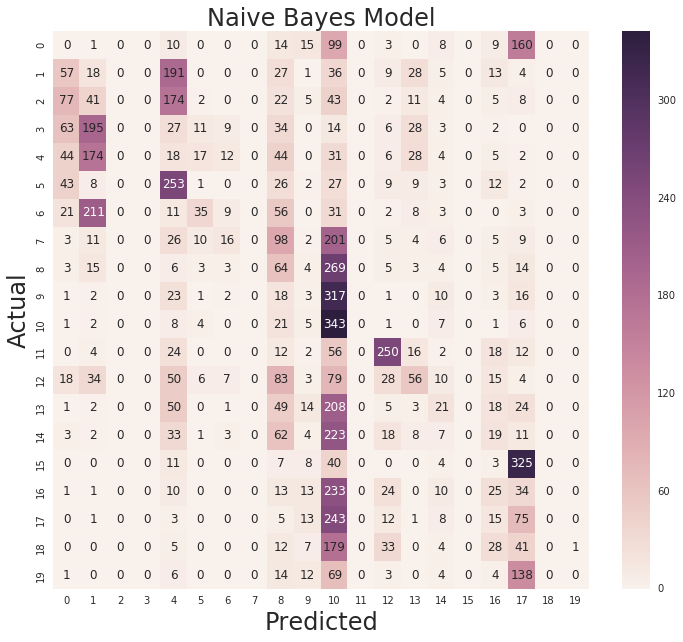

In [9]:
# Create Confusion Plot
fig, ax = plt.subplots(figsize=(12, 10))

from helper_code import mlplots as mp
mp.confusion(test['target'], ts_preds, range(20), 20, 'Naive Bayes Model')

-----
### Student Activity

- Why are classification results so bad?
- Increase topic model terms.
- Change classifier.
- Use normalized values.

-----

## Latent Dirichlet allocation

Perhaps the most popular topic modeling algorithm is [Latent Dirichlet
allocation][wlda] or LDA. LDA assumes that documents in a Corpus result
from a mixture of a small number of topics,  and that the words in the
document can be attributed to one of the topics that make up that
document. The scikit learn library has an [LDA implementation][sklda],
which can be easily applied to a data set, as demonstrated below. After
constructing an LDA model, we extract the topics (in this case we are
identifying topics for the newsgroup data set) and display the top terms
in each topic.

-----
[wlda]: https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation
[sklda]: http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html

In [10]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_topics=num_topics, max_iter=5,
                                learning_method='online', learning_offset=5.,
                                random_state=23).fit(train_data)

In [11]:
lda_topics = tp.get_topics(cv, lda)

Topic  0: people don just think like god know time say good
Topic  1: 650 da bat ml gary col ho mt pl p2
Topic  2: game team games players year season play hockey player baseball
Topic  3: thanks windows use know does drive like mail edu card
Topic  4: bike oil armenian miles gordon pitt ride surrender banks armenians
Topic  5: bus nasa space orbit launch shuttle ax lunar moon satellite


-----

### Visualizing Topics

We can visualize he important terms in a topic by constructing a
[wordle][ww], which is a word cloud where the size of the word indicates
its relative importance. To do this, we will use the Python [word cloud][pwn]
library as demonstrated in the following code cell, where we display a
word cloud for the first topic and a word cloud for all topics.

-----
[ww]: http://www.wordle.net
[pwn]: http://amueller.github.io/word_cloud/

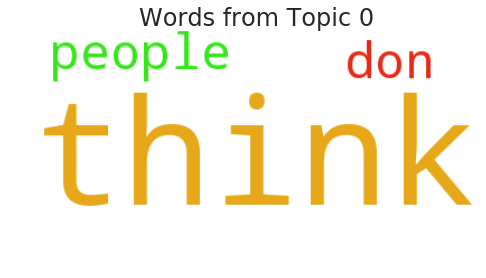

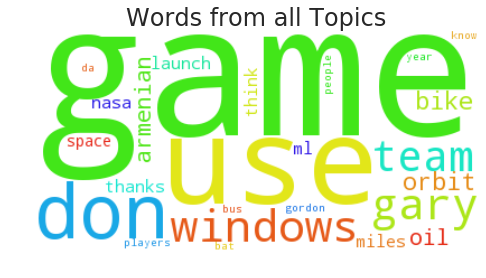

In [12]:
from helper_code import wcviz as wc

wc.make_wc(lda_topics[0].replace(',', ''), 'Words from Topic 0')

text = ', '.join(lda_topics)
wc.make_wc(text.replace(',', ''), 'Words from all Topics')

-----

### Student Activity

In the preceding cells, we . Now
that you have run the Notebook, try making the following changes.

1. ... . Can you ?

2. Change 

3. Using 

4. Try 

-----

## Gensim

Start with simple intro to gensim

-----

In [13]:
# Next section follows gensim tutorial

# As a text example, we use the course description for INFO490  SP16.
info_course = ['Advanced Data Science: This class is an asynchronous, online course.', 
               'This course will introduce advanced data science concepts by building on the foundational concepts presented in INFO 490: Foundations of Data Science.', 
               'Students will first learn how to perform more statistical data exploration and constructing and evaluating statistical models.', 
               'Next, students will learn machine learning techniques including supervised and unsupervised learning, dimensional reduction, and cluster finding.', 
               'An emphasis will be placed on the practical application of these techniques to high-dimensional numerical data, time series data, image data, and text data.', 
               'Finally, students will learn to use relational databases and cloud computing software components such as Hadoop, Spark, and NoSQL data stores.', 
               'Students must have access to a fairly modern computer, ideally that supports hardware virtualization, on which they can install software.', 
               'This class is open to sophomores, juniors, seniors and graduate students in any discipline who have either taken a previous INFO 490 data science course or have received instructor permission.']

# Simple stop words
stop_words = set('for a of the and to in on an'.split())

# Parse text into words, make lowercase and remove stop words
txts = [[word for word in sentance.lower().split() if word not in stop_words]
        for sentance in info_course]

# Keep only those words appearing more than once
# Easy with a Counter, but need a flat list
from collections import Counter
frequency = Counter([word for txt in txts for word in txt])

# Now grab tokens that appear more than once
tokens = [[token for token in txt if frequency[token] > 1]
          for txt in txts]

# Display the tokens
import pprint
pp = pprint.PrettyPrinter(indent=2, depth=2, width=80, compact=True)

pp.pprint(tokens)

[ ['advanced', 'data', 'this', 'class', 'is'],
  [ 'this', 'course', 'will', 'advanced', 'data', 'science', 'concepts',
    'concepts', 'info', 'data'],
  ['students', 'will', 'learn', 'statistical', 'data', 'statistical'],
  ['students', 'will', 'learn', 'techniques'],
  ['will', 'techniques', 'data,', 'data,', 'data,'],
  ['students', 'will', 'learn', 'data'], ['students', 'have'],
  [ 'this', 'class', 'is', 'students', 'have', 'info', 'data', 'science',
    'course', 'have']]


In [14]:
from gensim import corpora
dict_gensim = corpora.Dictionary(tokens)
print(dict_gensim)

Dictionary(16 unique tokens: ['is', 'info', 'students', 'this', 'science']...)


In [15]:
print(dict_gensim.token2id)

{'is': 4, 'info': 8, 'students': 12, 'this': 0, 'science': 9, 'data,': 14, 'data': 3, 'course': 6, 'will': 5, 'statistical': 11, 'advanced': 2, 'have': 15, 'class': 1, 'learn': 10, 'concepts': 7, 'techniques': 13}


In [16]:
new_txt = 'data science is cool, you should take this course to learn data concepts'
new_vec = dict_gensim.doc2bow(new_txt.lower().split())
pp.pprint(new_vec)

[(0, 1), (3, 2), (4, 1), (6, 1), (7, 1), (9, 1), (10, 1)]


In [17]:
crps = [dict_gensim.doc2bow(txt) for txt in txts]
print(crps)

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)], [(0, 1), (2, 1), (3, 2), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1)], [(3, 1), (5, 1), (10, 1), (11, 2), (12, 1)], [(5, 1), (10, 1), (12, 1), (13, 1)], [(5, 1), (13, 1), (14, 3)], [(3, 1), (5, 1), (10, 1), (12, 1)], [(12, 1), (15, 1)], [(0, 1), (1, 1), (3, 1), (4, 1), (6, 1), (8, 1), (9, 1), (12, 1), (15, 2)]]


-----

### Topic Modeling


-----

In [18]:
from gensim import models

tfidf = models.TfidfModel(crps)

In [19]:
print(new_txt)
print(new_vec)

pp.pprint(tfidf[new_vec])

data science is cool, you should take this course to learn data concepts
[(0, 1), (3, 2), (4, 1), (6, 1), (7, 1), (9, 1), (10, 1)]
[ (0, 0.2731153103729994), (3, 0.2617482842884797), (4, 0.3860184772660643),
  (6, 0.3860184772660643), (7, 0.5790277158990964), (9, 0.3860184772660643),
  (10, 0.2731153103729994)]


In [20]:
crps_tfidf = tfidf[crps]
lda_gs = models.LdaModel(corpus=crps_tfidf, id2word=dict_gensim, num_topics=3, passes=15)

In [21]:
lda_gs.print_topics(3)

['0.193*statistical + 0.067*learn + 0.062*data + 0.060*will + 0.059*students + 0.051*techniques + 0.051*have + 0.051*data, + 0.051*info + 0.051*course',
 '0.142*learn + 0.110*students + 0.103*have + 0.094*techniques + 0.091*will + 0.090*concepts + 0.072*data + 0.040*course + 0.040*science + 0.040*info',
 '0.109*data, + 0.099*is + 0.099*class + 0.088*this + 0.084*advanced + 0.082*have + 0.064*science + 0.064*info + 0.064*course + 0.054*data']

In [22]:
import operator

for idx, txt in enumerate(lda_gs[crps_tfidf]):
    srt_txt = sorted(txt, key=operator.itemgetter(1))
    print('Sentance {0:1d} has primary topic {1:1d} with probability = {2:4.3f}'\
          .format(idx, srt_txt[-1][0], srt_txt[-1][1]))

Sentance 0 has primary topic 2 with probability = 0.780
Sentance 1 has primary topic 1 with probability = 0.485
Sentance 2 has primary topic 0 with probability = 0.614
Sentance 3 has primary topic 1 with probability = 0.758
Sentance 4 has primary topic 2 with probability = 0.645
Sentance 5 has primary topic 1 with probability = 0.761
Sentance 6 has primary topic 1 with probability = 0.687
Sentance 7 has primary topic 2 with probability = 0.795


In [23]:
ttps = lda_gs.top_topics(corpus=crps_tfidf, num_words=5)
idx = 0

for lst, val in ttps:
    print('Topic {0}'.format(idx))
    print(35*('-'))
    idx += 1
    for i, z in lst:
        print('    {0:20s}: {1:5.4f}'.format(z, i))
    print(35*('-'))

Topic 0
-----------------------------------
    statistical         : 0.1929
    learn               : 0.0674
    data                : 0.0616
    will                : 0.0604
    students            : 0.0588
-----------------------------------
Topic 1
-----------------------------------
    data,               : 0.1088
    is                  : 0.0987
    class               : 0.0987
    this                : 0.0884
    advanced            : 0.0845
-----------------------------------
Topic 2
-----------------------------------
    learn               : 0.1421
    students            : 0.1101
    have                : 0.1030
    techniques          : 0.0942
    will                : 0.0912
-----------------------------------


-----

### Topic Modeling with gensim

We can use the gensim library to perform topic modeling. We first need
to transform a sparse matrix (as provided by the scikit learn library)
into a gensim corpus. We also need to construct a vocabulary dictionary,
which we can do by transforming the scikit learn `CountVectorizer`
vocabulary into a dictionary that maps between `id` and the `word`. We
demonstrate this transformation in the following code cell for the
newsgroup training data.

-----

In [24]:
from gensim import matutils as mat
from gensim import models as md
from gensim.corpora.dictionary import Dictionary

# transform sparse matrix into gensim corpus
td_gensim = mat.Sparse2Corpus(train_data, documents_columns=False)

# Build temporary dictionary from scikit learn vectorizer
# for use with gensim
tmp_dct = dict((idv, word) for word, idv in cv.vocabulary_.items())
dct = Dictionary.from_corpus(td_gensim, id2word=tmp_dct)

-----

### Latent Semantic Analysis

We can use the gensim library to perform [Latent Semantic
Analysis][wlsa] or LSA; in gensim, however, this technique is called
[Latent Semantic Indexing][glsi] (or LSI). LSA assumes that words with
similar meanings will occur in close proximity. By leveraging this
assumption, we can build and process a term document matrix. After
processing, a cosine similarity can be used to identify words that are
similar. This technique is applied in the following code cell, where we
build an LSA model with six topics from the newsgroup text. The topics
are subsequently displayed as functions of the most important terms in
each topic.

-----
[wlsa]: https://en.wikipedia.org/wiki/Latent_semantic_analysis
[glsi]: http://radimrehurek.com/gensim/models/lsimodel.html

In [25]:
# LSI

lsi = md.lsimodel.LsiModel(corpus=td_gensim, id2word=dct, num_topics=6)
lsi.print_topics()

['0.167*"don" + 0.164*"just" + 0.162*"like" + 0.161*"know" + 0.153*"people" + 0.138*"think" + 0.128*"does" + 0.115*"good" + 0.114*"use" + 0.110*"time"',
 '-0.257*"god" + 0.241*"windows" + 0.226*"thanks" + -0.192*"people" + 0.157*"card" + 0.147*"drive" + 0.122*"dos" + -0.115*"jesus" + 0.114*"mail" + 0.113*"file"',
 '0.488*"god" + 0.184*"jesus" + 0.156*"windows" + 0.146*"does" + 0.134*"thanks" + -0.123*"year" + -0.118*"game" + -0.118*"pitt" + 0.118*"bible" + -0.117*"geb"',
 '0.263*"edu" + 0.238*"geb" + 0.236*"dsl" + 0.236*"cadre" + 0.236*"n3jxp" + 0.236*"chastity" + 0.234*"shameful" + 0.234*"pitt" + 0.234*"skepticism" + 0.234*"intellect"',
 '0.313*"key" + -0.251*"drive" + -0.221*"god" + 0.176*"chip" + 0.169*"government" + 0.168*"encryption" + 0.149*"clipper" + -0.140*"game" + 0.137*"use" + 0.132*"keys"']

-----

### Latent Dirichlet allocation

The gensim library also provides an implementation of the [Latent
Dirichlet allocation][glda] or LDA. We demonstrate the gensim LDA
technique in the following code cell, where we once again create an LDA
model with six topics for the newsgroup text. We subsequently display
the topics as functions of the top words within each topic. Finally, we
display the top five words in each topic, along with their topic
coherence, which is a measure of the words importance to the specific
topic.

-----

[glda]: http://radimrehurek.com/gensim/models/ldamodel.html

In [26]:
# LDA

lda_gs = md.LdaModel(corpus=td_gensim, id2word=dct, num_topics=6, passes=2)
lda_gs.show_topics()

['0.006*people + 0.005*don + 0.004*think + 0.004*just + 0.004*say + 0.003*like + 0.003*law + 0.003*know + 0.003*does + 0.003*right',
 '0.005*god + 0.004*people + 0.004*don + 0.004*just + 0.003*think + 0.003*said + 0.003*know + 0.003*like + 0.003*did + 0.003*time',
 '0.013*game + 0.013*team + 0.010*games + 0.009*season + 0.009*year + 0.007*players + 0.006*hockey + 0.006*win + 0.006*league + 0.005*baseball',
 '0.005*key + 0.004*edu + 0.004*car + 0.004*algorithm + 0.004*encryption + 0.004*keys + 0.003*code + 0.003*clipper + 0.003*soon + 0.003*gordon',
 '0.007*windows + 0.007*drive + 0.006*thanks + 0.006*card + 0.005*does + 0.005*know + 0.004*use + 0.004*dos + 0.004*scsi + 0.004*like',
 '0.004*edu + 0.003*use + 0.003*thanks + 0.003*like + 0.003*space + 0.003*data + 0.003*know + 0.003*com + 0.003*10 + 0.002*list']

In [27]:
ttps = lda_gs.top_topics(corpus=td_gensim, num_words=5)

In [28]:
idx = 0

for lst, val in ttps:
    print('Topic {0}'.format(idx))
    print(35*('-'))
    idx += 1
    for i, z in lst:
        print('    {0:20s}: {1:5.4f}'.format(z, i))
    print(35*('-'))

Topic 0
-----------------------------------
    god                 : 0.0047
    people              : 0.0044
    don                 : 0.0036
    just                : 0.0036
    think               : 0.0033
-----------------------------------
Topic 1
-----------------------------------
    people              : 0.0059
    don                 : 0.0051
    think               : 0.0044
    just                : 0.0043
    say                 : 0.0037
-----------------------------------
Topic 2
-----------------------------------
    game                : 0.0131
    team                : 0.0127
    games               : 0.0096
    season              : 0.0088
    year                : 0.0086
-----------------------------------
Topic 3
-----------------------------------
    edu                 : 0.0038
    use                 : 0.0034
    thanks              : 0.0033
    like                : 0.0032
    space               : 0.0032
-----------------------------------
Topic 4
------------

-----

### Student Activity

In the preceding cells, we . Now
that you have run the Notebook, try making the following changes.

1. ... . Can you ?

2. Change 

3. Using 

4. Try 

-----